First we read the csv files

In [7]:
import pandas as pd

drugCombinationPath = "drug_combinations.csv"
drug_combo_df = pd.read_csv(drugCombinationPath)

Now lets create a histogram to show the distribution of synergy scores

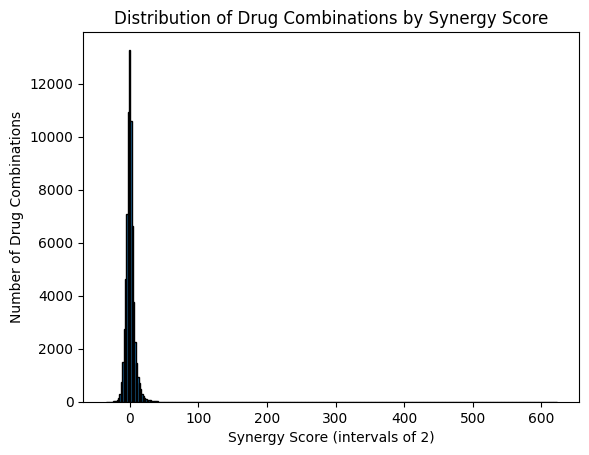

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# Create bins with intervals of 5 for the synergy scores
bins = np.arange(min(drug_combo_df['synergy']), max(drug_combo_df['synergy']) + 2, 2)

# Plotting the bar chart
plt.hist(drug_combo_df['synergy'], bins=bins, edgecolor='black')
plt.xlabel('Synergy Score (intervals of 2)')
plt.ylabel('Number of Drug Combinations')
plt.title('Distribution of Drug Combinations by Synergy Score')
plt.show()


It seems like som extreme outlieres pollute the data, lets remove them and try again

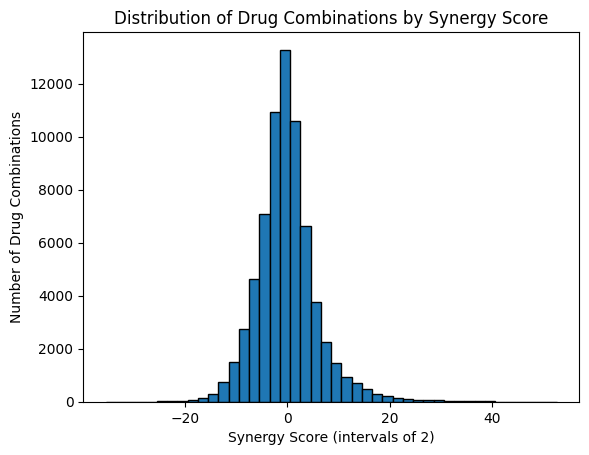

In [11]:
revised_drug_combo_df = drug_combo_df[drug_combo_df['synergy'] < 50]
bins = np.arange(min(revised_drug_combo_df['synergy']), max(revised_drug_combo_df['synergy']) + 5, 2)

# Plotting the bar chart
plt.hist(drug_combo_df['synergy'], bins=bins, edgecolor='black')
plt.xlabel('Synergy Score (intervals of 2)')
plt.ylabel('Number of Drug Combinations')
plt.title('Distribution of Drug Combinations by Synergy Score')
plt.show()

import cell data and change both the "cell" collumn in both files to the same types 
to be able to merge, then merge

In [32]:
cellDataPath = "cell_protein.csv"
cell_df = pd.read_csv(cellDataPath)

drug_combo_df["cell"] = drug_combo_df["cell"].astype(str).str.strip()
cell_df["cell"] = cell_df["cell"].astype(str).str.strip()

Merge to get two tables and get the relevant columns, then drop duplictes

In [33]:
merged_df = pd.merge(drug_combo_df, cellCsv, on = "cell", how="inner")
# Ensure no duplicate rows
merged_df = merged_df[["Drug1", "Drug2", "synergy", "Tissue"]].drop_duplicates()

Create heatmaps of each tissue type

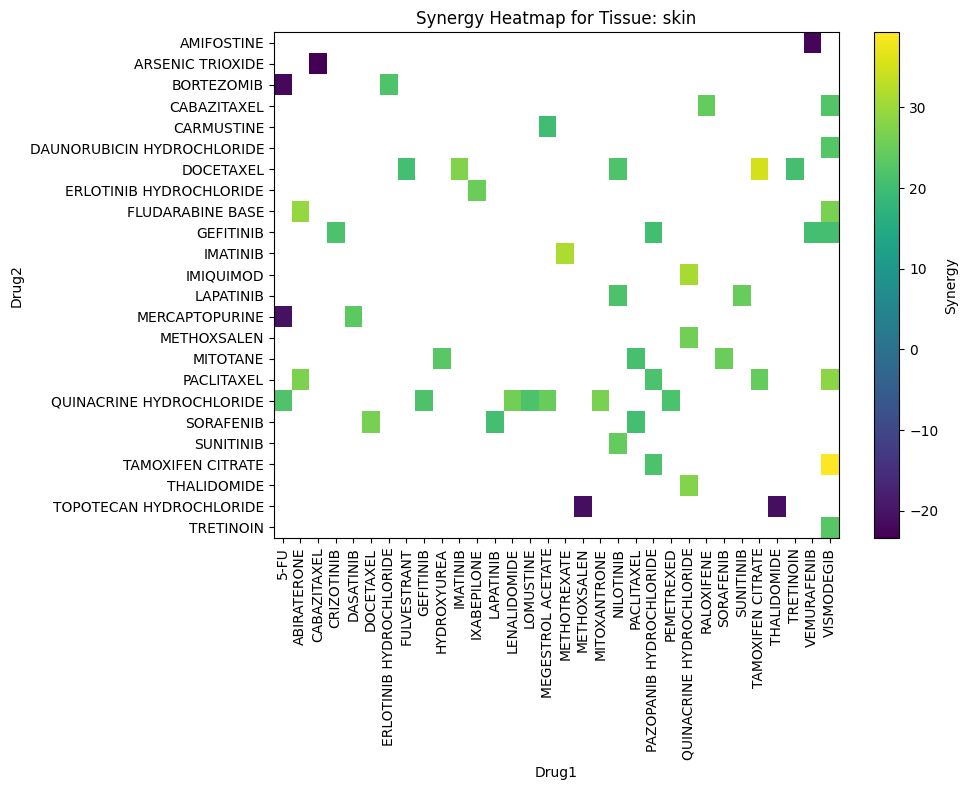

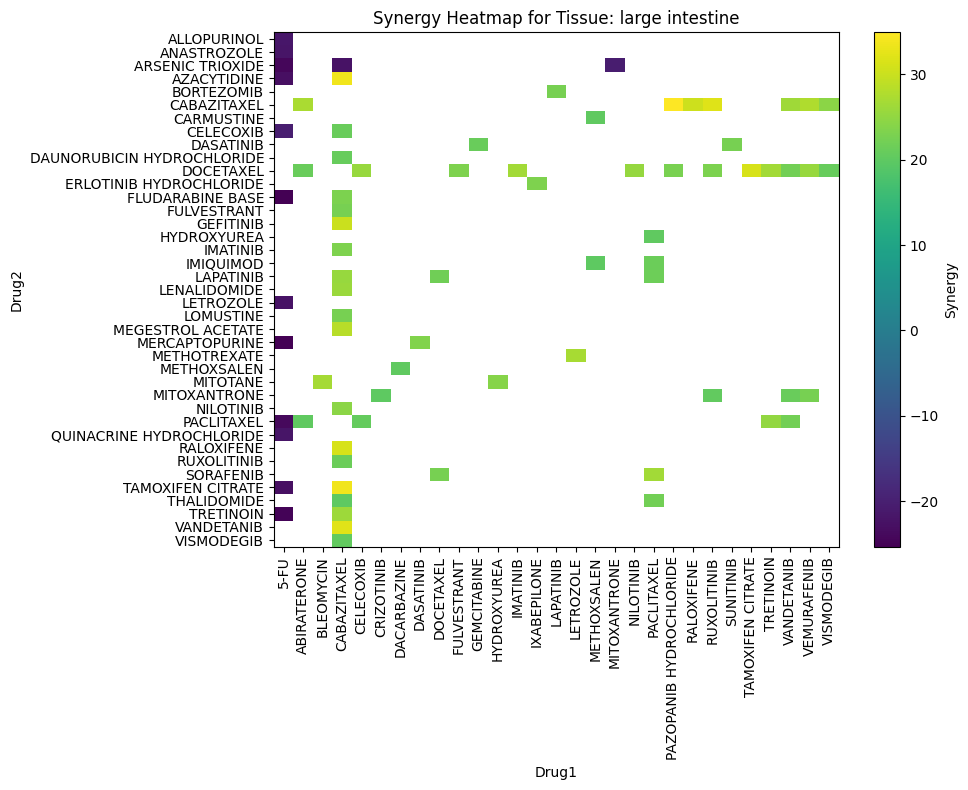

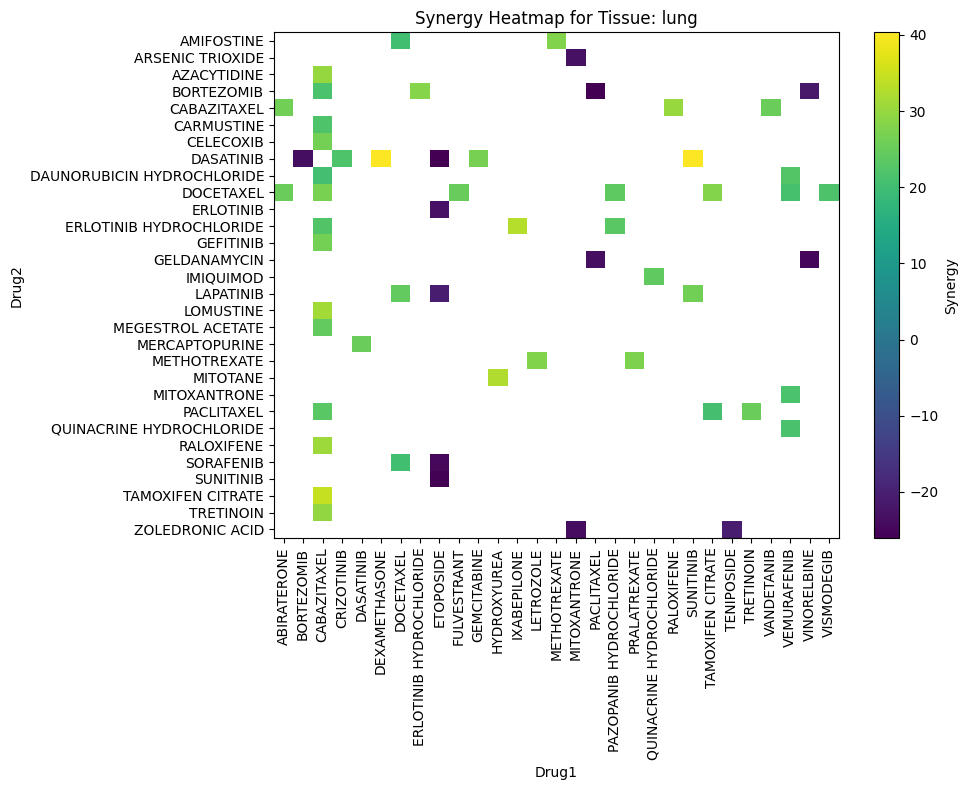

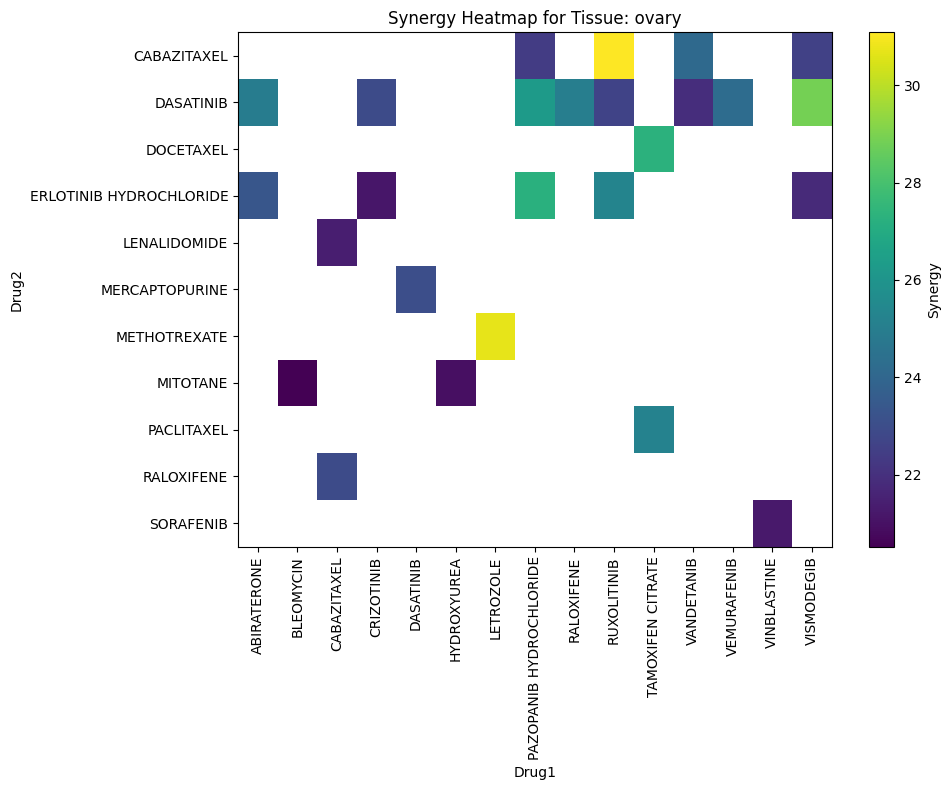

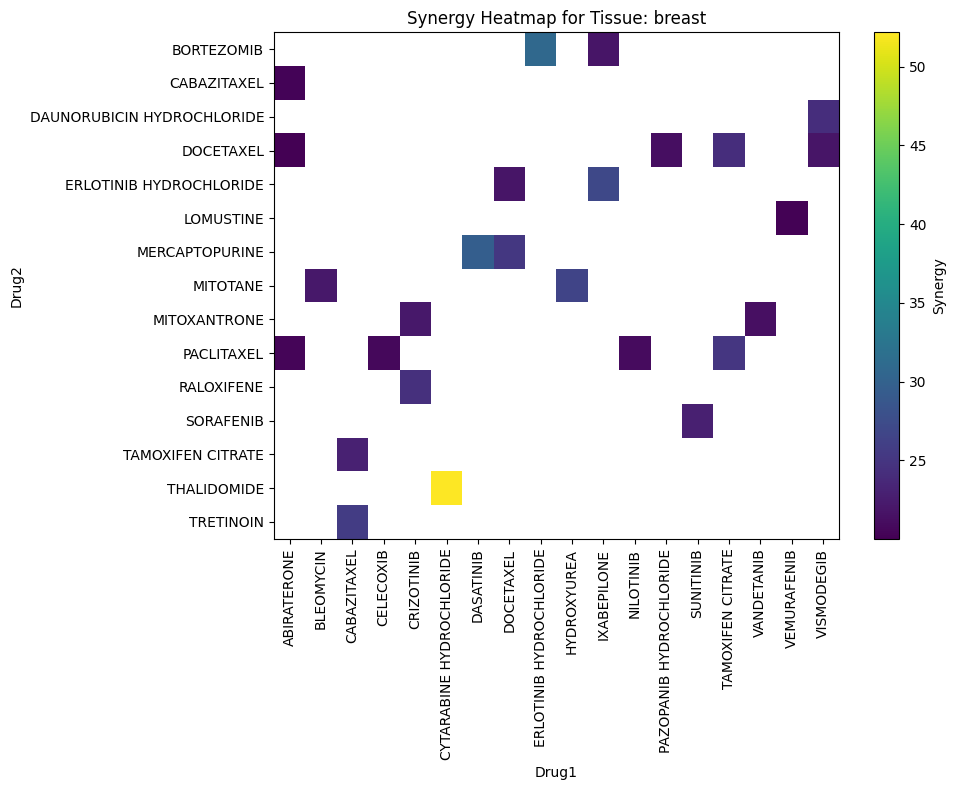

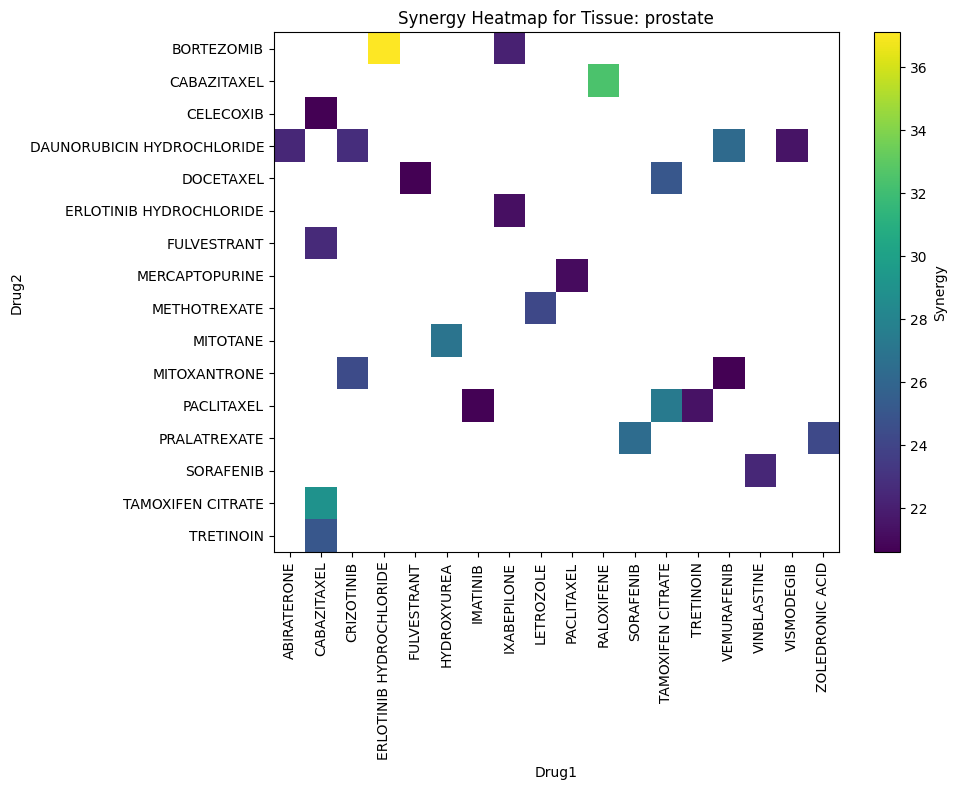

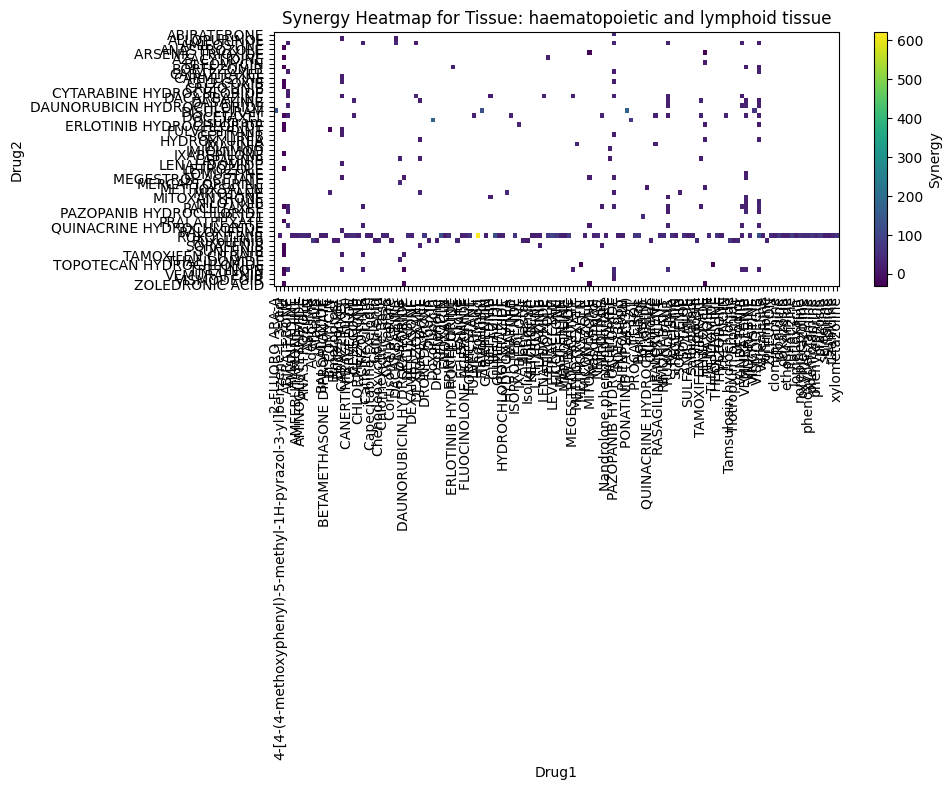

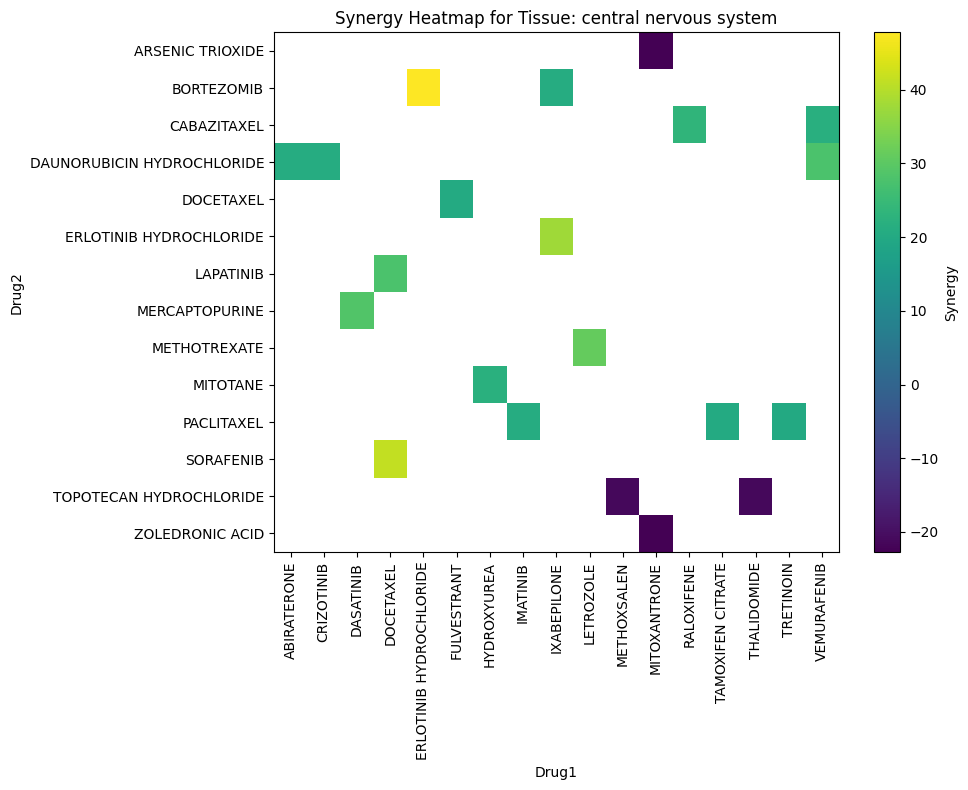

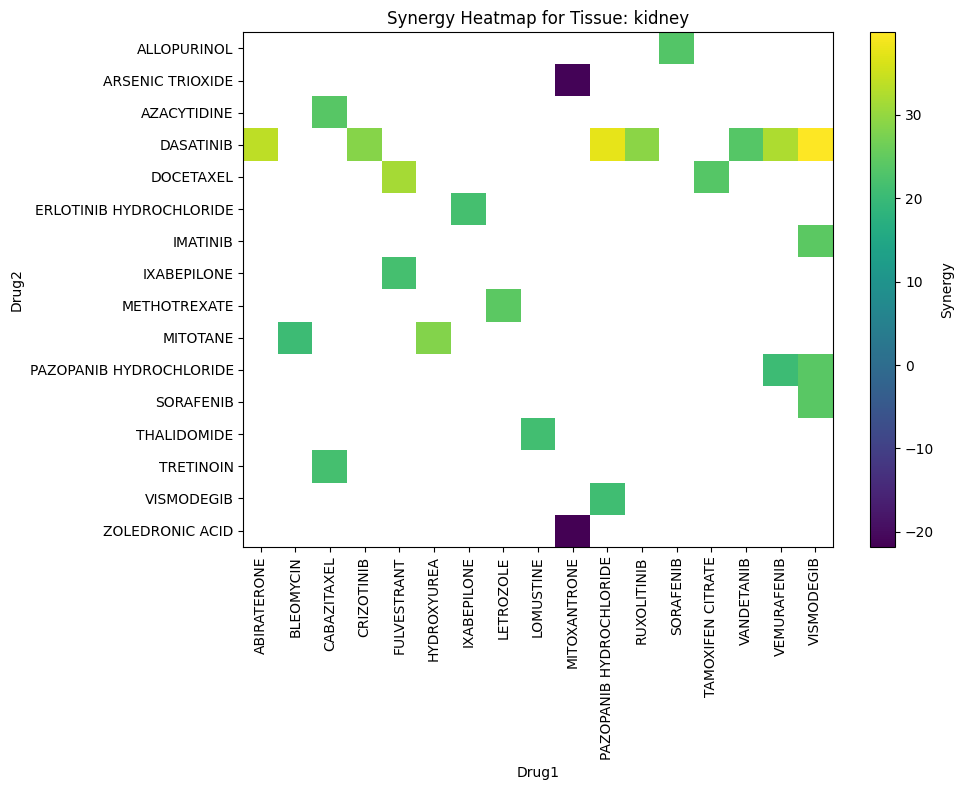

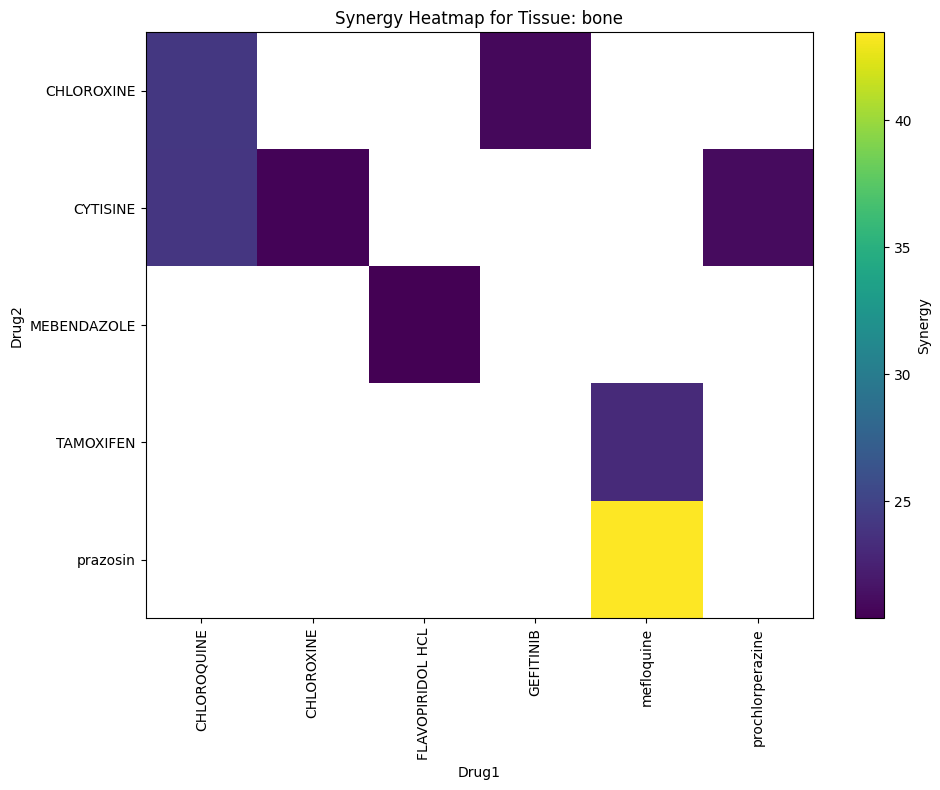

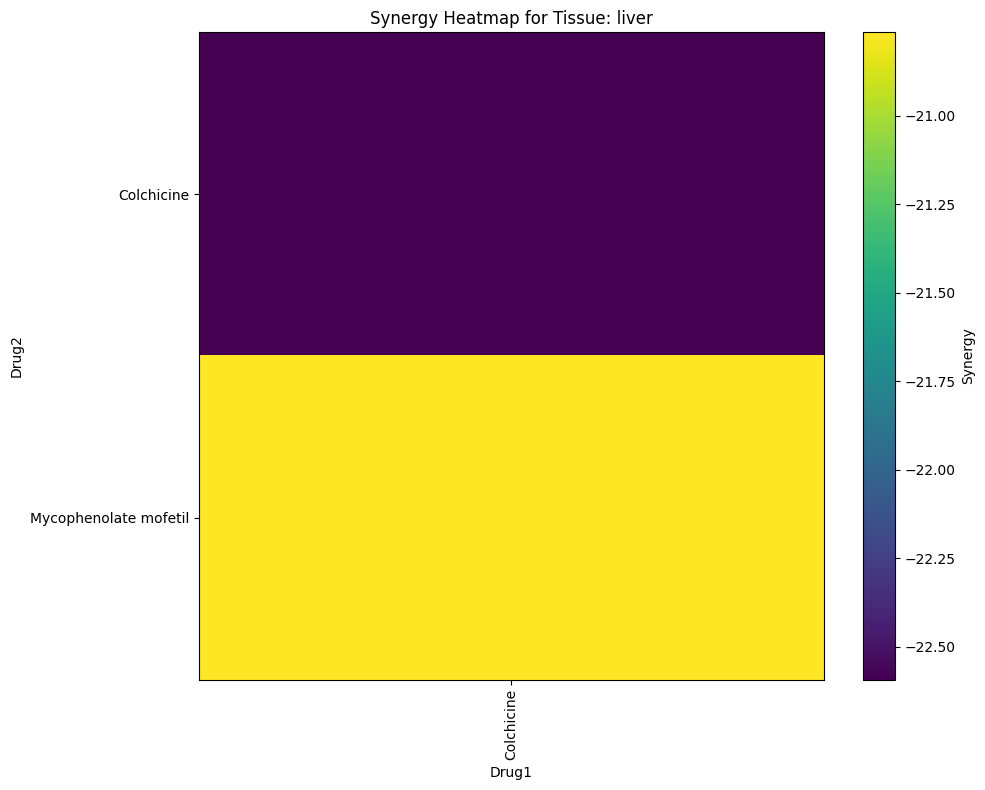

In [40]:
import matplotlib.pyplot as plt
import numpy as np


outliers_df = merged_df[(merged_df["synergy"] > 20.0) | (merged_df["synergy"] < -20.0)]
# Get unique tissue types
tissue_types = outliers_df["Tissue"].unique()

# Loop over each tissue type to create a heatmap
for tissue in tissue_types:
    # Filter for the current tissue type
    df = outliers_df[outliers_df["Tissue"] == tissue]

    # Aggregate any duplicate Drug1-Drug2 pairs by averaging synergy values
    df = df.groupby(["Drug1", "Drug2"], as_index=False).agg({"synergy": "mean"})

    # Pivot the data so Drug1 and Drug2 form the grid, with synergy as values
    heatmap_data = df.pivot(index="Drug2", columns="Drug1", values="synergy")

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap_data, cmap="viridis", aspect="auto")
    plt.colorbar(label="Synergy")

    # Set axis labels and title
    plt.xlabel("Drug1")
    plt.ylabel("Drug2")
    plt.title(f"Synergy Heatmap for Tissue: {tissue}")

    # Set x and y ticks with drug names
    plt.xticks(ticks=np.arange(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=90)
    plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index)

    plt.tight_layout()
    plt.show()

For haematopoietic and lymphoid tissue, there seems to be one or more extreme outliers, so we will look closer at that tissue

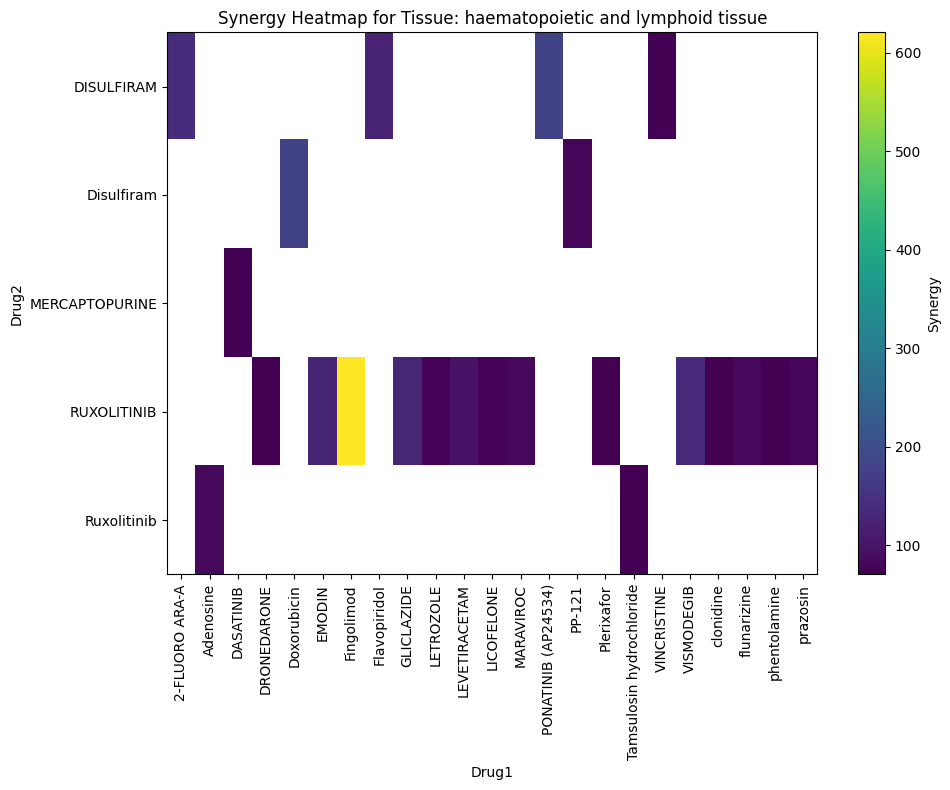

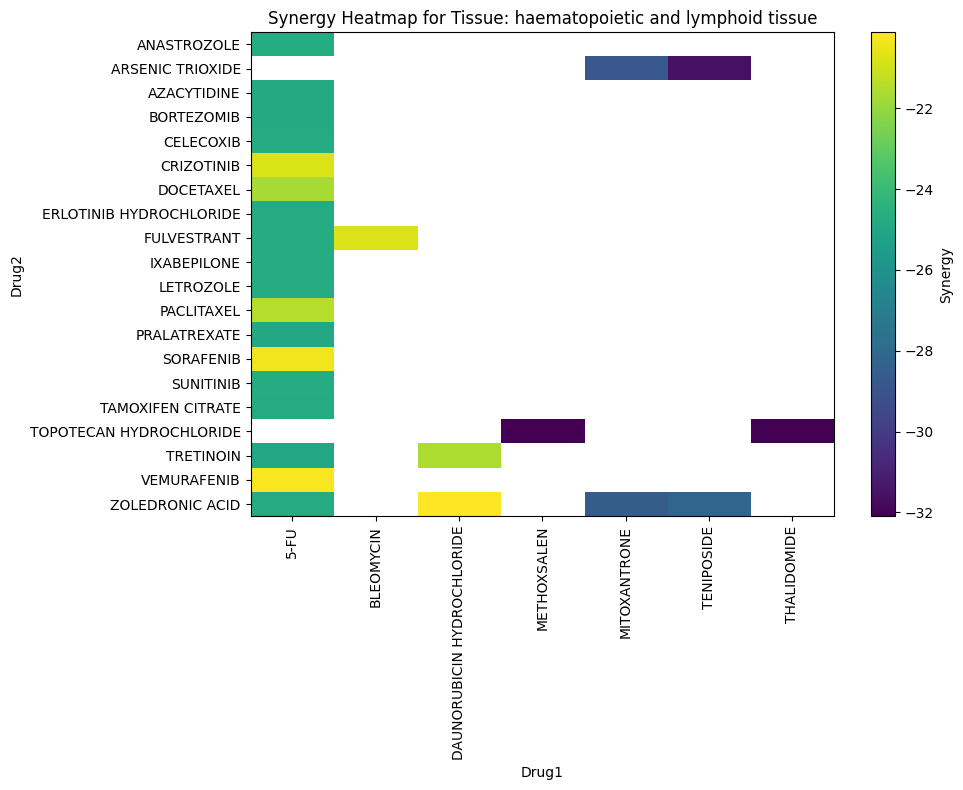

In [35]:
tissue = "haematopoietic and lymphoid tissue"

# Aggregate any duplicate Drug1-Drug2 pairs by averaging synergy values

df = merged_df[merged_df["Tissue"] == tissue]
list = [df[df["synergy"] > 70], df[df["synergy"] < -20] ]

for df in list:
    df = df.groupby(["Drug1", "Drug2"], as_index=False).agg({"synergy": "mean"})

    # Pivot the data so Drug1 and Drug2 form the grid, with synergy as values
    heatmap_data = df.pivot(index="Drug2", columns="Drug1", values="synergy")

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap_data, cmap="viridis", aspect="auto")
    plt.colorbar(label="Synergy")

    # Set axis labels and title
    plt.xlabel("Drug1")
    plt.ylabel("Drug2")
    plt.title(f"Synergy Heatmap for Tissue: {tissue}")

    # Set x and y ticks with drug names
    plt.xticks(ticks=np.arange(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=90)
    plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index)

    plt.tight_layout()
    plt.show()